In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap
import trimap
import pacmap

# Ensure that plots are displayed inline in the Jupyter Notebook
%matplotlib inline

# Load your dataset
csv_file_path = 'org_embeddings_total.csv'
df = pd.read_csv(csv_file_path)
df['embedding'] = df['embedding'].apply(eval).apply(np.array)

# Prepare data
embeddings = np.array(df['embedding'].tolist())
embeddings = StandardScaler().fit_transform(embeddings)  # Normalize the data

# t-SNE
tsne_embeddings = TSNE(n_components=2, random_state=42).fit_transform(embeddings)

# UMAP
umap_embeddings = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(embeddings)

# TriMap
trimap_embeddings = trimap.TRIMAP().fit_transform(embeddings)

# PaCMAP
pacmap_instance = pacmap.PaCMAP(n_components=2, n_neighbors=15)
pacmap_embeddings = pacmap_instance.fit_transform(embeddings)

# Visualization function with labels
def plot_embeddings(embeddings, title, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], s=5, cmap='Spectral')
    # Annotate each point in the plot
    for i, (x, y) in enumerate(embeddings):
        plt.text(x, y, ' ' + labels[i], color='black', fontsize=8, ha='right', va='bottom')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(scatter)
    plt.show()

# Names of entities assumed to be in 'Name' column of df
names = df['term'].tolist()

# Plotting with labels
plot_embeddings(tsne_embeddings, 't-SNE Visualization', names)
plot_embeddings(umap_embeddings, 'UMAP Visualization', names)
plot_embeddings(trimap_embeddings, 'TriMap Visualization', names)
plot_embeddings(pacmap_embeddings, 'PaCMAP Visualization', names)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import trimap

# Ensure plots display directly in the notebook
%matplotlib inline

# Load your dataset
csv_file_path = 'org_embeddings_total.csv'
df = pd.read_csv(csv_file_path)
df['embedding'] = df['embedding'].apply(eval).apply(np.array)

# Prepare data
embeddings = np.array(df['embedding'].tolist())
embeddings = StandardScaler().fit_transform(embeddings)  # Normalize the data

# TriMap
trimap_embeddings = trimap.TRIMAP().fit_transform(embeddings)

# Visualization function with labels
def plot_embeddings(embeddings, title, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], s=5, cmap='Spectral')
    for i, (x, y) in enumerate(embeddings):
        plt.text(x, y, ' ' + str(labels[i]), color='black', fontsize=8, ha='right', va='bottom')  # Convert labels to string
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(scatter)
    plt.show()

# Names of entities assumed to be in 'Name' column of df
names = df['term'].tolist()

/tmp/ipykernel_229656/23612164.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], s=5, cmap='Spectral')


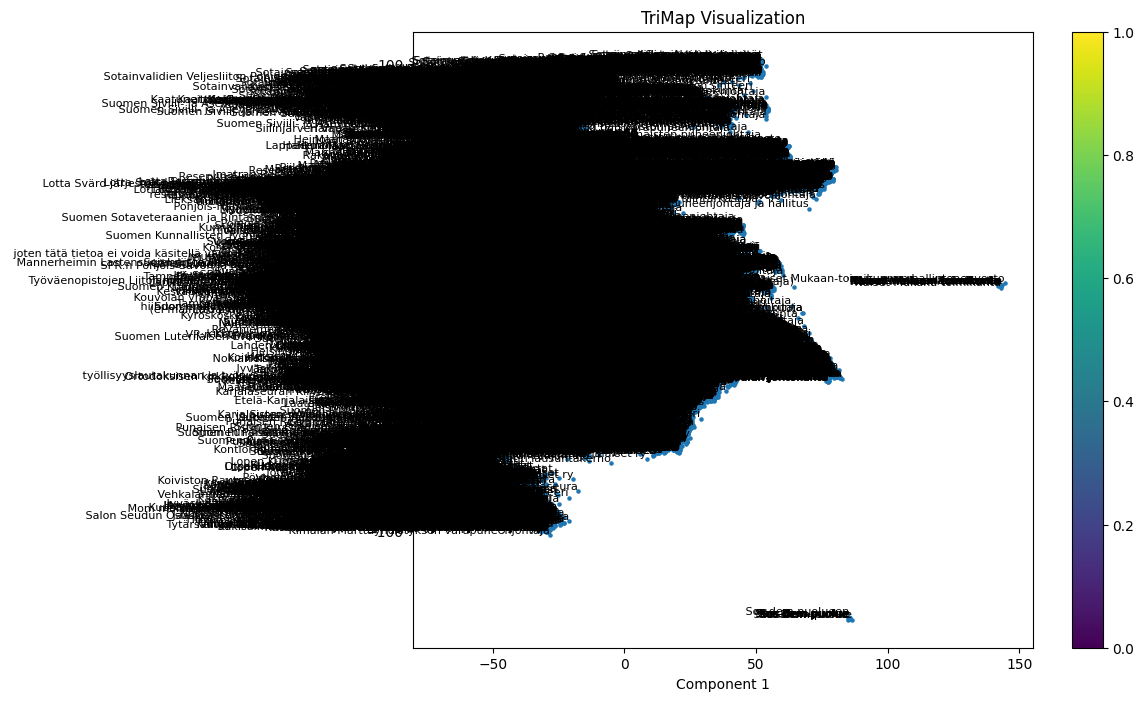

In [3]:


# Plotting TriMap Visualization
plot_embeddings(trimap_embeddings, 'TriMap Visualization', names)


In [1]:
#simple
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import trimap
import plotly.express as px
import os
from sklearn.cluster import KMeans

def load_and_prepare_data(csv_file_path):
    df = pd.read_csv(csv_file_path)
    df['embedding'] = df['embedding'].apply(eval).apply(np.array)
    embeddings = np.array(df['embedding'].tolist())
    embeddings = StandardScaler().fit_transform(embeddings)  # Normalize the data
    return df, embeddings

def reduce_dimensions(embeddings):
    trimap_embeddings = trimap.TRIMAP().fit_transform(embeddings)
    return trimap_embeddings

def cluster_embeddings(embeddings, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(embeddings)

def wrap_text(text, width):
    """Wrap text with a given width."""
    return '<br>'.join([text[i:i+width] for i in range(0, len(text), width)])

def plot_embeddings(embeddings, index, combined_text, cluster_labels, output_dir):
    df_plot = pd.DataFrame(embeddings, columns=['x', 'y'])
    df_plot['index'] = index
    df_plot['combined_text'] = combined_text
    df_plot['cluster'] = cluster_labels

    # Create hover text with index and story text
    df_plot['hover_text'] = df_plot.apply(lambda row: f"<b>Index:</b> {row['index']}<br><b>Story:</b> {wrap_text(row['combined_text'], 80)}", axis=1)

    fig = px.scatter(df_plot, x='x', y='y', color='cluster',
                     title='Clustered Visualization',
                     hover_name='index', hover_data={'index': True, 'combined_text': True},
                     width=2000, height=1500)  # Increased size for better visibility

    # Update the hovertemplate to use the custom hover text and display as a block element
    fig.update_traces(marker=dict(size=8), 
                      hovertemplate="%{customdata[0]}<extra></extra>",
                      customdata=df_plot[['hover_text']].values)

    fig.update_layout(
        legend_title_text='Cluster',
        hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell", bordercolor="black"),
    )
    
    # Save the figure as an HTML file
    html_file = os.path.join(output_dir, 'clustered_visualization_stories_simple.html')
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    fig.write_html(html_file)

def main():
    csv_file_path = 'All_Stories_embeddings.csv'
    output_dir = 'cluster_visualizations'
    n_clusters = 1500

    df, embeddings = load_and_prepare_data(csv_file_path)
    embeddings_reduced = reduce_dimensions(embeddings)
    cluster_labels = cluster_embeddings(embeddings_reduced, n_clusters)
    combined_text = df['combined_text'].tolist()  # Assuming you have this column
    plot_embeddings(embeddings_reduced, df['index'].tolist(), combined_text, cluster_labels, output_dir)

if __name__ == "__main__":
    main()


In [2]:
#clip
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import trimap
import plotly.express as px
import os
from sklearn.cluster import KMeans

def load_and_prepare_data(csv_file_path):
    df = pd.read_csv(csv_file_path)
    df['embedding'] = df['embedding'].apply(eval).apply(np.array)
    embeddings = np.array(df['embedding'].tolist())
    embeddings = StandardScaler().fit_transform(embeddings)  # Normalize the data
    return df, embeddings

def reduce_dimensions(embeddings):
    trimap_embeddings = trimap.TRIMAP().fit_transform(embeddings)
    return trimap_embeddings

def cluster_embeddings(embeddings, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(embeddings)

def wrap_text(text, width):
    """Wrap text with a given width."""
    return '<br>'.join([text[i:i+width] for i in range(0, len(text), width)])

def plot_embeddings(embeddings, index, combined_text, cluster_labels, output_dir):
    df_plot = pd.DataFrame(embeddings, columns=['x', 'y'])
    df_plot['index'] = index
    df_plot['combined_text'] = combined_text
    df_plot['cluster'] = cluster_labels

    # Create hover text with index and wrapped story text
    df_plot['hover_text'] = df_plot.apply(lambda row: f"<b>Index:</b> {row['index']}<br><b> Story:</b> {wrap_text(row['combined_text'], 80)}", axis=1)

    fig = px.scatter(df_plot, x='x', y='y', color='cluster',
                     title='Clustered Visualization',
                     hover_name='index', hover_data={'index': True, 'combined_text': True},
                     width=2000, height=1500)  # Increased size for better visibility

    # Update the hovertemplate to use the custom hover text and display as a block element
    fig.update_traces(marker=dict(size=8), 
                      hovertemplate="<div style='white-space:normal; width:300px;'>%{customdata[0]}<extra></extra></div>",
                      customdata=df_plot[['hover_text']].values)

    fig.update_layout(
        legend_title_text='Cluster',
        hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell", bordercolor="black"),
    )
    
    # Save the figure as an HTML file
    html_file = os.path.join(output_dir, 'clustered_visualization_stories_clip2.html')
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    fig.write_html(html_file)
    
    # Add custom JavaScript for copying to clipboard
    with open(html_file, 'a') as f:
        f.write("""
<script>
    document.addEventListener('DOMContentLoaded', function() {
        var plot = document.querySelector('.plotly-graph-div');
        plot.on('plotly_click', function(data) {
            var infotext = data.points.map(function(d) {
                return d.customdata[0].replace(/<[^>]+>/g, '');  // Remove HTML tags for clean clipboard content
            });
            copyToClipboard(infotext.join('\\n\\n'));
        });
    });

    function copyToClipboard(text) {
        var el = document.createElement('textarea');
        el.value = text;
        document.body.appendChild(el);
        el.select();
        document.execCommand('copy');
        document.body.removeChild(el);
        var notification = document.createElement('div');
        notification.innerHTML = 'Copied to clipboard';
        notification.style.position = 'fixed';
        notification.style.bottom = '10px';
        notification.style.left = '10px';
        notification.style.padding = '10px';
        notification.style.backgroundColor = '#5cb85c';
        notification.style.color = 'white';
        notification.style.borderRadius = '5px';
        document.body.appendChild(notification);
        setTimeout(function() {
            document.body.removeChild(notification);
        }, 2000);
    }
</script>
        """)

def main():
    csv_file_path = 'All_Stories_embeddings.csv'
    output_dir = 'cluster_visualizations'
    n_clusters = 1500

    df, embeddings = load_and_prepare_data(csv_file_path)
    embeddings_reduced = reduce_dimensions(embeddings)
    cluster_labels = cluster_embeddings(embeddings_reduced, n_clusters)
    combined_text = df['combined_text'].tolist()  # Assuming you have this column
    plot_embeddings(embeddings_reduced, df['index'].tolist(), combined_text, cluster_labels, output_dir)

if __name__ == "__main__":
    main()
